# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [22]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

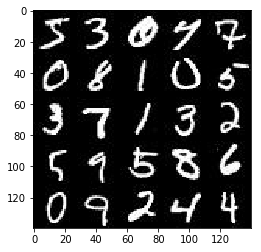

In [23]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

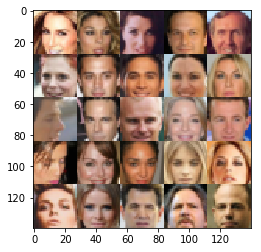

In [24]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [25]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/jacky/Developer/deep_learning/anaconda3/envs/dlnd/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [26]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    input_real = tf.placeholder(
        tf.float32, 
        [None, image_width, image_height, image_channels], 
        name="input_real")
    input_z = tf.placeholder(tf.float32, [None, z_dim], name="input_z")
    learning_rate = tf.placeholder(tf.float32, [], name="learning_rate")

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [27]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        alpha = 0.1
        
        conv1 = tf.layers.conv2d(images, 64, 5, 2, 'same')
        conv1 = tf.maximum(alpha * conv1, conv1)
        
        conv2 = tf.layers.conv2d(conv1, 128, 5, 2, 'same')
        conv2 = tf.layers.batch_normalization(conv2, training=True)
        conv2 = tf.maximum(alpha * conv2, conv2)
        
        conv3 = tf.layers.conv2d(conv2, 256, 5, 2, 'same')
        conv3 = tf.layers.batch_normalization(conv3, training=True)
        conv3 = tf.maximum(alpha * conv3, conv3)
        
        flat = tf.reshape(conv3, (-1, 2*2*256))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [28]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.2
    
        conv1 = tf.layers.dense(z, 2*2*512)
        conv1 = tf.reshape(conv1, (-1, 2, 2, 512))
        conv1 = tf.layers.batch_normalization(conv1, training=is_train)
        conv1 = tf.maximum(alpha * conv1, conv1)
    
        conv2 = tf.layers.conv2d_transpose(conv1, 256, 5, 2, 'valid')
        conv2 = tf.layers.batch_normalization(conv2, training=is_train)
        conv2 = tf.maximum(alpha * conv2, conv2)
    
        conv3 = tf.layers.conv2d_transpose(conv2, 128, 5, 2, 'same')
        conv3 = tf.layers.batch_normalization(conv3, training=is_train)
        conv3 = tf.maximum(alpha * conv3, conv3)
    
        logits = tf.layers.conv2d_transpose(conv3, out_channel_dim, 5, 2, 'same')
        output = tf.tanh(logits)
    
        return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [29]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [30]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)    
    with tf.control_dependencies(update_ops):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [31]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [35]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height,image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z,image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    steps = 0
    print_loss_every = 20
    show_every = 100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images = batch_images * 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})

                if steps % print_loss_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 50, input_z, image_channels, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.2026... Generator Loss: 6.4041
Epoch 1/2... Discriminator Loss: 0.4505... Generator Loss: 3.4178
Epoch 1/2... Discriminator Loss: 0.3998... Generator Loss: 1.8986
Epoch 1/2... Discriminator Loss: 0.2869... Generator Loss: 2.9686
Epoch 1/2... Discriminator Loss: 0.0769... Generator Loss: 3.9860


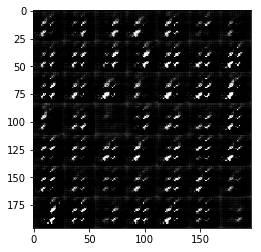

Epoch 1/2... Discriminator Loss: 0.8899... Generator Loss: 1.2095
Epoch 1/2... Discriminator Loss: 0.6158... Generator Loss: 5.3006
Epoch 1/2... Discriminator Loss: 0.4718... Generator Loss: 1.7825
Epoch 1/2... Discriminator Loss: 0.2299... Generator Loss: 3.5150
Epoch 1/2... Discriminator Loss: 0.9525... Generator Loss: 3.9514


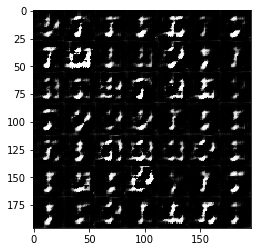

Epoch 1/2... Discriminator Loss: 1.8677... Generator Loss: 0.2944
Epoch 1/2... Discriminator Loss: 0.8462... Generator Loss: 2.3374
Epoch 1/2... Discriminator Loss: 0.4702... Generator Loss: 1.4756
Epoch 1/2... Discriminator Loss: 0.9278... Generator Loss: 0.7249
Epoch 1/2... Discriminator Loss: 0.8644... Generator Loss: 0.9242


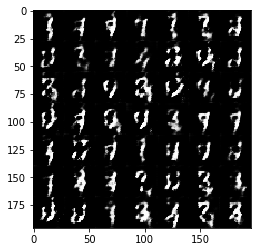

Epoch 1/2... Discriminator Loss: 0.5611... Generator Loss: 1.8211
Epoch 1/2... Discriminator Loss: 0.5723... Generator Loss: 1.7792
Epoch 1/2... Discriminator Loss: 0.8472... Generator Loss: 0.9032
Epoch 1/2... Discriminator Loss: 0.8227... Generator Loss: 0.9243
Epoch 1/2... Discriminator Loss: 1.4005... Generator Loss: 0.4654


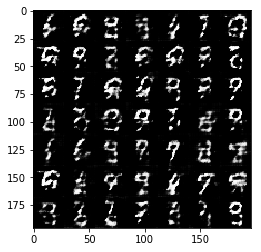

Epoch 1/2... Discriminator Loss: 0.7567... Generator Loss: 1.7318
Epoch 1/2... Discriminator Loss: 0.9314... Generator Loss: 0.8929
Epoch 1/2... Discriminator Loss: 0.8793... Generator Loss: 1.2623
Epoch 1/2... Discriminator Loss: 1.2408... Generator Loss: 0.5746
Epoch 1/2... Discriminator Loss: 0.6350... Generator Loss: 2.1476


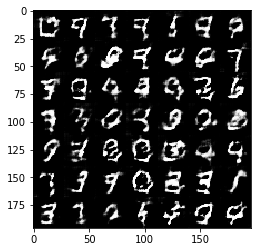

Epoch 1/2... Discriminator Loss: 1.0315... Generator Loss: 0.8633
Epoch 1/2... Discriminator Loss: 0.7018... Generator Loss: 1.5209
Epoch 1/2... Discriminator Loss: 0.8469... Generator Loss: 1.0329
Epoch 1/2... Discriminator Loss: 0.8100... Generator Loss: 1.0107
Epoch 1/2... Discriminator Loss: 0.7297... Generator Loss: 1.4601


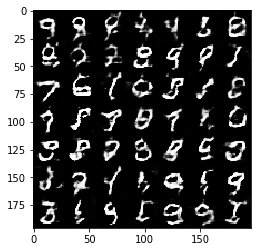

Epoch 1/2... Discriminator Loss: 1.3333... Generator Loss: 3.7577
Epoch 1/2... Discriminator Loss: 0.7112... Generator Loss: 1.4411
Epoch 1/2... Discriminator Loss: 0.8378... Generator Loss: 1.0245
Epoch 1/2... Discriminator Loss: 1.3783... Generator Loss: 0.4521
Epoch 1/2... Discriminator Loss: 0.9493... Generator Loss: 1.4095


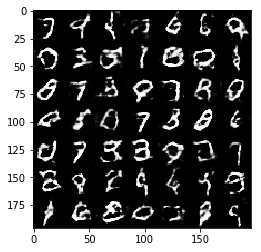

Epoch 1/2... Discriminator Loss: 1.4760... Generator Loss: 2.3195
Epoch 1/2... Discriminator Loss: 1.1937... Generator Loss: 2.4209
Epoch 1/2... Discriminator Loss: 0.7543... Generator Loss: 0.9787
Epoch 1/2... Discriminator Loss: 0.8979... Generator Loss: 0.9172
Epoch 1/2... Discriminator Loss: 0.8683... Generator Loss: 0.8575


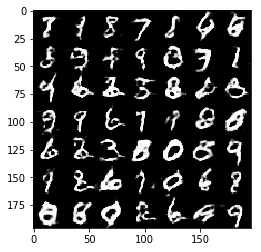

Epoch 1/2... Discriminator Loss: 0.9537... Generator Loss: 0.7070
Epoch 1/2... Discriminator Loss: 1.9985... Generator Loss: 3.1286
Epoch 1/2... Discriminator Loss: 1.2251... Generator Loss: 1.0475
Epoch 1/2... Discriminator Loss: 0.8123... Generator Loss: 1.2126
Epoch 1/2... Discriminator Loss: 0.7586... Generator Loss: 1.0459


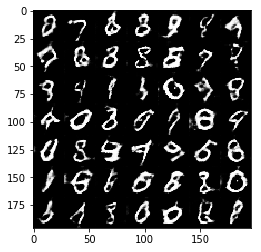

Epoch 1/2... Discriminator Loss: 0.8400... Generator Loss: 1.0901
Epoch 2/2... Discriminator Loss: 0.9751... Generator Loss: 0.6529
Epoch 2/2... Discriminator Loss: 1.0414... Generator Loss: 0.6566
Epoch 2/2... Discriminator Loss: 1.0007... Generator Loss: 0.7555
Epoch 2/2... Discriminator Loss: 0.8977... Generator Loss: 1.5407


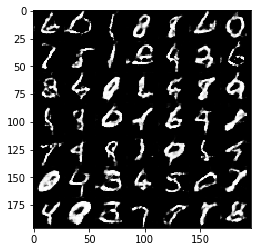

Epoch 2/2... Discriminator Loss: 1.1605... Generator Loss: 2.3006
Epoch 2/2... Discriminator Loss: 1.4841... Generator Loss: 0.5947
Epoch 2/2... Discriminator Loss: 1.0093... Generator Loss: 0.7132
Epoch 2/2... Discriminator Loss: 1.4099... Generator Loss: 0.4502
Epoch 2/2... Discriminator Loss: 0.7282... Generator Loss: 1.5038


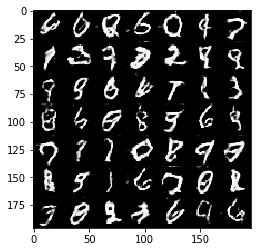

Epoch 2/2... Discriminator Loss: 0.8297... Generator Loss: 1.0367
Epoch 2/2... Discriminator Loss: 0.6754... Generator Loss: 2.0583
Epoch 2/2... Discriminator Loss: 0.9995... Generator Loss: 0.6718
Epoch 2/2... Discriminator Loss: 0.9814... Generator Loss: 0.7255
Epoch 2/2... Discriminator Loss: 0.8829... Generator Loss: 0.7882


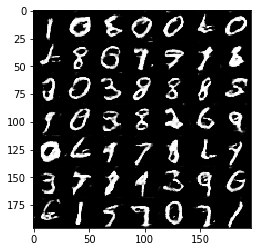

Epoch 2/2... Discriminator Loss: 0.8040... Generator Loss: 0.9776
Epoch 2/2... Discriminator Loss: 0.9830... Generator Loss: 0.6814
Epoch 2/2... Discriminator Loss: 0.7624... Generator Loss: 1.3239
Epoch 2/2... Discriminator Loss: 1.1854... Generator Loss: 0.5219
Epoch 2/2... Discriminator Loss: 1.5592... Generator Loss: 3.5937


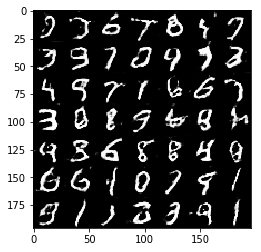

Epoch 2/2... Discriminator Loss: 1.3603... Generator Loss: 1.0958
Epoch 2/2... Discriminator Loss: 1.0871... Generator Loss: 0.5843
Epoch 2/2... Discriminator Loss: 0.9025... Generator Loss: 1.0794
Epoch 2/2... Discriminator Loss: 1.0793... Generator Loss: 0.6193
Epoch 2/2... Discriminator Loss: 1.0414... Generator Loss: 1.7617


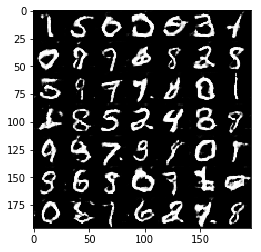

Epoch 2/2... Discriminator Loss: 1.0909... Generator Loss: 2.4150
Epoch 2/2... Discriminator Loss: 0.8276... Generator Loss: 0.8445
Epoch 2/2... Discriminator Loss: 0.8774... Generator Loss: 1.3399
Epoch 2/2... Discriminator Loss: 0.8216... Generator Loss: 0.9484
Epoch 2/2... Discriminator Loss: 0.7157... Generator Loss: 1.3130


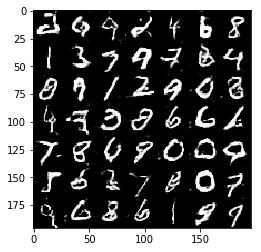

Epoch 2/2... Discriminator Loss: 0.7625... Generator Loss: 1.0648
Epoch 2/2... Discriminator Loss: 0.7343... Generator Loss: 0.9739
Epoch 2/2... Discriminator Loss: 0.7749... Generator Loss: 0.9180
Epoch 2/2... Discriminator Loss: 0.7323... Generator Loss: 1.4696
Epoch 2/2... Discriminator Loss: 0.8931... Generator Loss: 0.8361


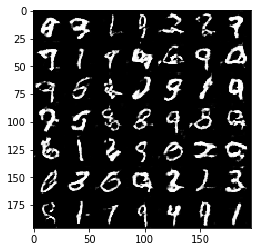

Epoch 2/2... Discriminator Loss: 0.9872... Generator Loss: 1.9968
Epoch 2/2... Discriminator Loss: 1.0694... Generator Loss: 0.8622
Epoch 2/2... Discriminator Loss: 0.7886... Generator Loss: 1.0002
Epoch 2/2... Discriminator Loss: 0.7087... Generator Loss: 1.2302
Epoch 2/2... Discriminator Loss: 1.0020... Generator Loss: 0.6582


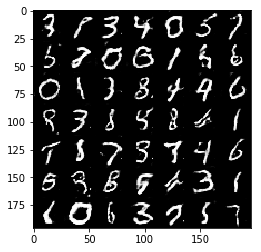

Epoch 2/2... Discriminator Loss: 1.0088... Generator Loss: 0.7284
Epoch 2/2... Discriminator Loss: 0.7595... Generator Loss: 1.0140
Epoch 2/2... Discriminator Loss: 0.4821... Generator Loss: 1.3390
Epoch 2/2... Discriminator Loss: 1.6369... Generator Loss: 0.3420
Epoch 2/2... Discriminator Loss: 0.7846... Generator Loss: 1.3426


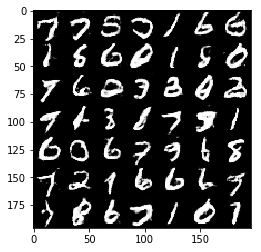

Epoch 2/2... Discriminator Loss: 1.0518... Generator Loss: 0.8222
Epoch 2/2... Discriminator Loss: 0.8145... Generator Loss: 1.0131
Epoch 2/2... Discriminator Loss: 0.6738... Generator Loss: 1.2124


In [36]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.0199... Generator Loss: 5.9957
Epoch 1/1... Discriminator Loss: 0.8525... Generator Loss: 0.8287
Epoch 1/1... Discriminator Loss: 0.2296... Generator Loss: 3.4585
Epoch 1/1... Discriminator Loss: 0.1588... Generator Loss: 3.1557
Epoch 1/1... Discriminator Loss: 0.7644... Generator Loss: 0.7993


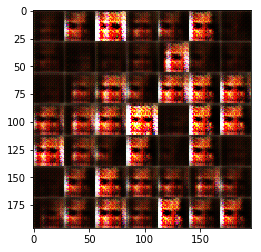

Epoch 1/1... Discriminator Loss: 0.4163... Generator Loss: 1.7202
Epoch 1/1... Discriminator Loss: 0.2627... Generator Loss: 3.1486
Epoch 1/1... Discriminator Loss: 0.8678... Generator Loss: 1.6549
Epoch 1/1... Discriminator Loss: 0.4635... Generator Loss: 1.7741
Epoch 1/1... Discriminator Loss: 0.3516... Generator Loss: 2.7687


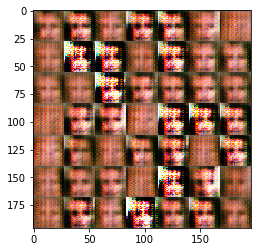

Epoch 1/1... Discriminator Loss: 0.6214... Generator Loss: 1.8271
Epoch 1/1... Discriminator Loss: 2.3525... Generator Loss: 0.2202
Epoch 1/1... Discriminator Loss: 0.5721... Generator Loss: 2.4689
Epoch 1/1... Discriminator Loss: 1.4100... Generator Loss: 0.9540
Epoch 1/1... Discriminator Loss: 0.6448... Generator Loss: 2.0307


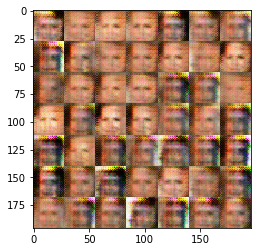

Epoch 1/1... Discriminator Loss: 0.8093... Generator Loss: 1.1299
Epoch 1/1... Discriminator Loss: 0.7097... Generator Loss: 0.9712
Epoch 1/1... Discriminator Loss: 1.2025... Generator Loss: 0.9022
Epoch 1/1... Discriminator Loss: 0.9964... Generator Loss: 0.9293
Epoch 1/1... Discriminator Loss: 1.1535... Generator Loss: 1.0796


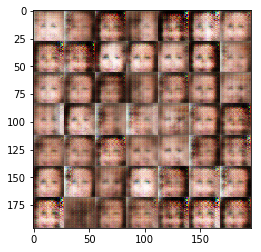

Epoch 1/1... Discriminator Loss: 0.9950... Generator Loss: 0.8156
Epoch 1/1... Discriminator Loss: 1.0699... Generator Loss: 1.0859
Epoch 1/1... Discriminator Loss: 1.2296... Generator Loss: 0.6969
Epoch 1/1... Discriminator Loss: 0.7599... Generator Loss: 1.2677
Epoch 1/1... Discriminator Loss: 0.9013... Generator Loss: 1.1325


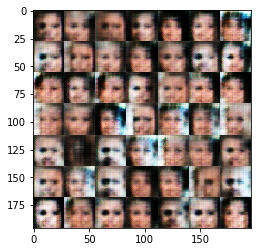

Epoch 1/1... Discriminator Loss: 1.1102... Generator Loss: 0.7359
Epoch 1/1... Discriminator Loss: 0.9885... Generator Loss: 0.8208
Epoch 1/1... Discriminator Loss: 1.3469... Generator Loss: 0.7208
Epoch 1/1... Discriminator Loss: 1.2018... Generator Loss: 1.2165
Epoch 1/1... Discriminator Loss: 0.8637... Generator Loss: 1.1126


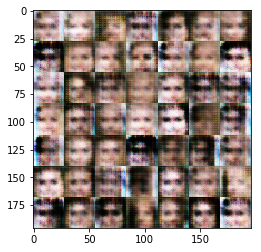

Epoch 1/1... Discriminator Loss: 0.9439... Generator Loss: 1.1811
Epoch 1/1... Discriminator Loss: 1.5436... Generator Loss: 1.4075
Epoch 1/1... Discriminator Loss: 0.7288... Generator Loss: 1.3711
Epoch 1/1... Discriminator Loss: 1.1461... Generator Loss: 1.5626
Epoch 1/1... Discriminator Loss: 0.9049... Generator Loss: 0.9533


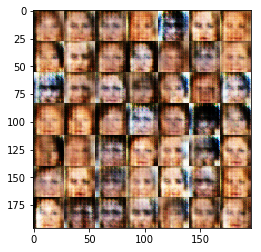

Epoch 1/1... Discriminator Loss: 0.8449... Generator Loss: 1.1393
Epoch 1/1... Discriminator Loss: 0.9510... Generator Loss: 1.0652
Epoch 1/1... Discriminator Loss: 0.4196... Generator Loss: 2.6258
Epoch 1/1... Discriminator Loss: 0.7165... Generator Loss: 1.4012
Epoch 1/1... Discriminator Loss: 0.9321... Generator Loss: 1.3469


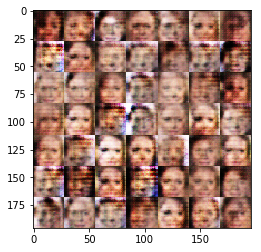

Epoch 1/1... Discriminator Loss: 0.8110... Generator Loss: 1.0512
Epoch 1/1... Discriminator Loss: 0.9102... Generator Loss: 1.2449
Epoch 1/1... Discriminator Loss: 1.0362... Generator Loss: 1.1062
Epoch 1/1... Discriminator Loss: 0.9562... Generator Loss: 1.4465
Epoch 1/1... Discriminator Loss: 1.1051... Generator Loss: 0.6609


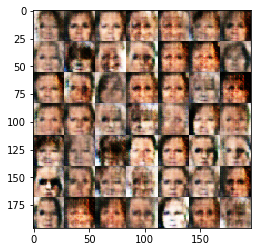

Epoch 1/1... Discriminator Loss: 0.9986... Generator Loss: 0.7468
Epoch 1/1... Discriminator Loss: 1.0902... Generator Loss: 1.2938
Epoch 1/1... Discriminator Loss: 1.1457... Generator Loss: 0.9180
Epoch 1/1... Discriminator Loss: 1.2579... Generator Loss: 0.5786
Epoch 1/1... Discriminator Loss: 0.9224... Generator Loss: 1.1129


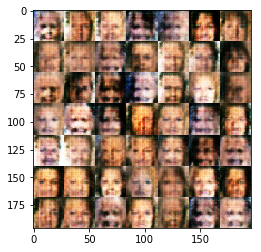

Epoch 1/1... Discriminator Loss: 0.8943... Generator Loss: 0.9520
Epoch 1/1... Discriminator Loss: 1.0498... Generator Loss: 1.1073
Epoch 1/1... Discriminator Loss: 0.9881... Generator Loss: 1.4803
Epoch 1/1... Discriminator Loss: 1.3929... Generator Loss: 0.6011
Epoch 1/1... Discriminator Loss: 0.9494... Generator Loss: 0.9485


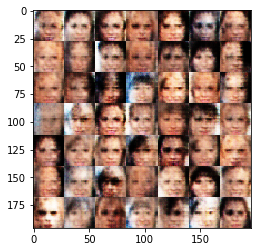

Epoch 1/1... Discriminator Loss: 0.8783... Generator Loss: 1.3254
Epoch 1/1... Discriminator Loss: 0.8115... Generator Loss: 1.6131
Epoch 1/1... Discriminator Loss: 0.9485... Generator Loss: 1.2253
Epoch 1/1... Discriminator Loss: 0.8091... Generator Loss: 1.3174
Epoch 1/1... Discriminator Loss: 0.8357... Generator Loss: 1.0246


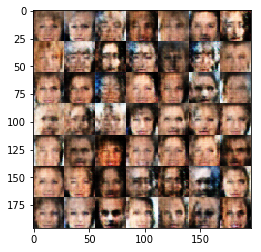

Epoch 1/1... Discriminator Loss: 0.9916... Generator Loss: 0.9897
Epoch 1/1... Discriminator Loss: 1.2678... Generator Loss: 0.5213
Epoch 1/1... Discriminator Loss: 0.8324... Generator Loss: 1.2944
Epoch 1/1... Discriminator Loss: 0.8329... Generator Loss: 1.2866
Epoch 1/1... Discriminator Loss: 0.8581... Generator Loss: 1.6203


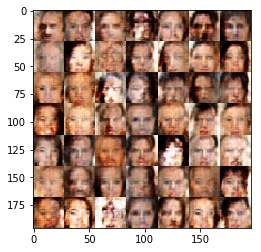

Epoch 1/1... Discriminator Loss: 1.1251... Generator Loss: 1.9422
Epoch 1/1... Discriminator Loss: 0.7881... Generator Loss: 1.2146
Epoch 1/1... Discriminator Loss: 0.9538... Generator Loss: 1.8069
Epoch 1/1... Discriminator Loss: 1.4129... Generator Loss: 0.4515
Epoch 1/1... Discriminator Loss: 0.8707... Generator Loss: 0.9515


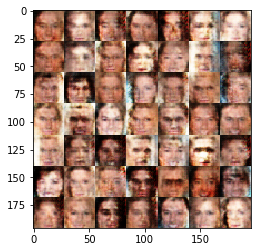

Epoch 1/1... Discriminator Loss: 0.8690... Generator Loss: 1.1680
Epoch 1/1... Discriminator Loss: 0.8980... Generator Loss: 1.9285
Epoch 1/1... Discriminator Loss: 0.8711... Generator Loss: 1.9067
Epoch 1/1... Discriminator Loss: 0.7255... Generator Loss: 1.3755
Epoch 1/1... Discriminator Loss: 0.8490... Generator Loss: 0.9288


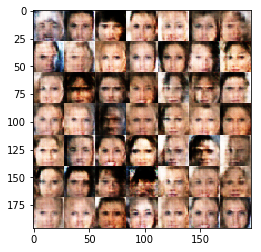

Epoch 1/1... Discriminator Loss: 0.9513... Generator Loss: 1.2235
Epoch 1/1... Discriminator Loss: 0.9973... Generator Loss: 0.8869
Epoch 1/1... Discriminator Loss: 0.8081... Generator Loss: 0.9626
Epoch 1/1... Discriminator Loss: 1.0437... Generator Loss: 1.8285
Epoch 1/1... Discriminator Loss: 0.8244... Generator Loss: 1.1789


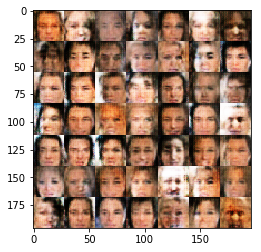

Epoch 1/1... Discriminator Loss: 0.9021... Generator Loss: 1.2656
Epoch 1/1... Discriminator Loss: 0.7812... Generator Loss: 1.0843
Epoch 1/1... Discriminator Loss: 1.1208... Generator Loss: 0.8800
Epoch 1/1... Discriminator Loss: 1.0612... Generator Loss: 1.9055
Epoch 1/1... Discriminator Loss: 1.0646... Generator Loss: 0.9607


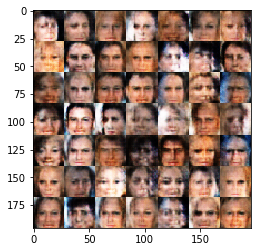

Epoch 1/1... Discriminator Loss: 0.8514... Generator Loss: 0.8961
Epoch 1/1... Discriminator Loss: 0.9241... Generator Loss: 1.3755
Epoch 1/1... Discriminator Loss: 0.9416... Generator Loss: 1.0379
Epoch 1/1... Discriminator Loss: 1.0728... Generator Loss: 0.8503
Epoch 1/1... Discriminator Loss: 1.0332... Generator Loss: 0.8187


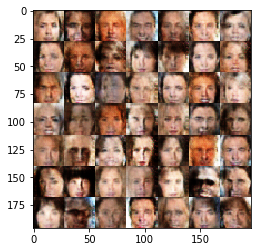

Epoch 1/1... Discriminator Loss: 1.0734... Generator Loss: 1.5440
Epoch 1/1... Discriminator Loss: 1.0683... Generator Loss: 1.6314
Epoch 1/1... Discriminator Loss: 1.0130... Generator Loss: 0.9443
Epoch 1/1... Discriminator Loss: 0.9010... Generator Loss: 0.9726
Epoch 1/1... Discriminator Loss: 1.2131... Generator Loss: 1.2175


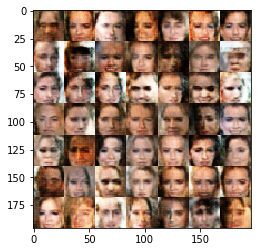

Epoch 1/1... Discriminator Loss: 1.0462... Generator Loss: 0.7026
Epoch 1/1... Discriminator Loss: 1.1411... Generator Loss: 0.7557
Epoch 1/1... Discriminator Loss: 0.9207... Generator Loss: 1.1081
Epoch 1/1... Discriminator Loss: 1.4770... Generator Loss: 2.1362
Epoch 1/1... Discriminator Loss: 0.9021... Generator Loss: 1.1304


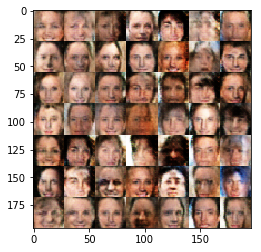

Epoch 1/1... Discriminator Loss: 0.9401... Generator Loss: 0.8160
Epoch 1/1... Discriminator Loss: 0.8628... Generator Loss: 0.9626
Epoch 1/1... Discriminator Loss: 1.0678... Generator Loss: 1.0280
Epoch 1/1... Discriminator Loss: 0.9070... Generator Loss: 1.0361
Epoch 1/1... Discriminator Loss: 0.9570... Generator Loss: 1.3005


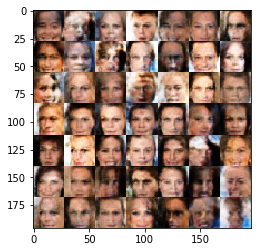

Epoch 1/1... Discriminator Loss: 1.0761... Generator Loss: 1.2437
Epoch 1/1... Discriminator Loss: 0.8713... Generator Loss: 1.2543
Epoch 1/1... Discriminator Loss: 1.0250... Generator Loss: 1.4679
Epoch 1/1... Discriminator Loss: 0.8665... Generator Loss: 0.9851
Epoch 1/1... Discriminator Loss: 0.9506... Generator Loss: 1.1826


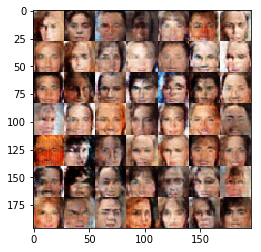

Epoch 1/1... Discriminator Loss: 0.9280... Generator Loss: 0.9526
Epoch 1/1... Discriminator Loss: 1.0586... Generator Loss: 0.7357
Epoch 1/1... Discriminator Loss: 0.9013... Generator Loss: 1.0857
Epoch 1/1... Discriminator Loss: 0.8939... Generator Loss: 1.3304
Epoch 1/1... Discriminator Loss: 0.7067... Generator Loss: 1.7802


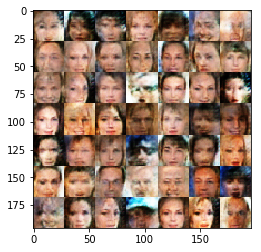

Epoch 1/1... Discriminator Loss: 1.1249... Generator Loss: 1.8428
Epoch 1/1... Discriminator Loss: 0.9657... Generator Loss: 1.5008
Epoch 1/1... Discriminator Loss: 0.9905... Generator Loss: 1.3732
Epoch 1/1... Discriminator Loss: 0.9705... Generator Loss: 1.2801
Epoch 1/1... Discriminator Loss: 0.8426... Generator Loss: 1.1990


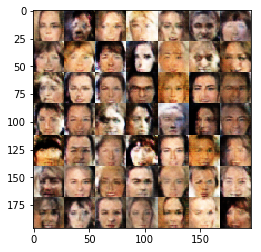

Epoch 1/1... Discriminator Loss: 0.9481... Generator Loss: 0.9290
Epoch 1/1... Discriminator Loss: 0.8214... Generator Loss: 1.1798
Epoch 1/1... Discriminator Loss: 1.0496... Generator Loss: 0.7044
Epoch 1/1... Discriminator Loss: 1.0024... Generator Loss: 0.7967
Epoch 1/1... Discriminator Loss: 1.1386... Generator Loss: 0.6540


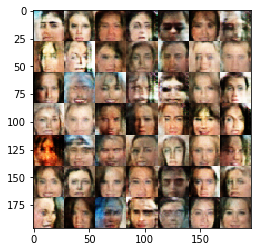

Epoch 1/1... Discriminator Loss: 1.0847... Generator Loss: 1.3698
Epoch 1/1... Discriminator Loss: 0.9492... Generator Loss: 0.9863
Epoch 1/1... Discriminator Loss: 0.9204... Generator Loss: 1.1817
Epoch 1/1... Discriminator Loss: 1.1023... Generator Loss: 0.6117
Epoch 1/1... Discriminator Loss: 1.1782... Generator Loss: 0.6938


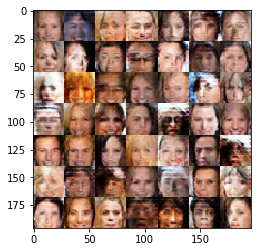

Epoch 1/1... Discriminator Loss: 1.1585... Generator Loss: 0.6805
Epoch 1/1... Discriminator Loss: 1.3005... Generator Loss: 0.5320
Epoch 1/1... Discriminator Loss: 1.0979... Generator Loss: 1.1833
Epoch 1/1... Discriminator Loss: 1.1023... Generator Loss: 0.9337
Epoch 1/1... Discriminator Loss: 1.0299... Generator Loss: 0.9035


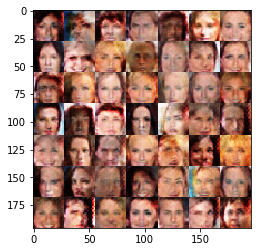

Epoch 1/1... Discriminator Loss: 1.0884... Generator Loss: 0.6984
Epoch 1/1... Discriminator Loss: 0.9327... Generator Loss: 1.0801
Epoch 1/1... Discriminator Loss: 0.9950... Generator Loss: 1.0859
Epoch 1/1... Discriminator Loss: 0.9617... Generator Loss: 1.1204
Epoch 1/1... Discriminator Loss: 0.9907... Generator Loss: 0.8020


KeyboardInterrupt: 

In [37]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.